In [1]:
# Into Exp. Physics II HW9, Gabriel Bridges
# Problem 8.2
# GLB300@nyu.edu

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t, r, dr = np.loadtxt("Data2.csv",skiprows=4 , unpack=True, delimiter=",")

In [4]:
x = np.log(t)
y = np.log(r)

In [5]:
plt.figure(1)
plt.plot(x,y,'ro', ms=3)

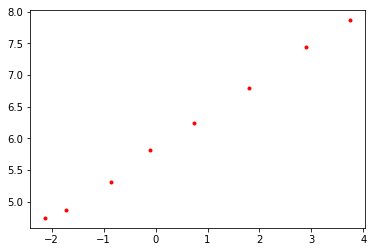

In [6]:
plt.show()

In [7]:
def avgXY(x, y, dy):
    sigmaSqr = 0
    for n in dy:
        sigmaSqr += 1/(n**2)
    Xavg = 0
    for i in range (0, len(x)):
        Xavg += x[i]/(dy[i]**2)
    Xavg *= 1/sigmaSqr
    Yavg = 0
    for i in range (0, len(y)):
        Yavg += y[i]/(dy[i]**2)
    Yavg *= 1/sigmaSqr
    return Xavg, Yavg

def LineFitWt(x, y, dy):
    sigmaSqr = 0
    for n in dy:
        sigmaSqr += 1/(n**2)
    mNume = 0
    for n in range (0, len(x)):
        mNume += ((x[n]-avgXY(x, y, dy)[0])*y[n])/(dy[n]**2)
    mDenom = 0
    for n in range (0, len(x)):
        mDenom += ((x[n]-avgXY(x, y, dy)[0])*x[n])/(dy[n]**2)
    m = mNume/mDenom
    b = avgXY(x, y, dy)[1]-m*avgXY(x, y, dy)[0]
    yFit = (x*m)+b
    sigmaM = 0
    for n in range (0, len(x)):
        sigmaM += ((x[n]-avgXY(x, y, dy)[0])*x[n])/(dy[n]**2)
    sigmaM = 1/sigmaM
    sigmaB = 0
    sigmaSqr = 0
    for n in range (0, len(dy)):
        sigmaSqr += 1/(dy[n]**2)
    for n in range (0, len(x)):
        sigmaB += (x[n]**2)/(dy[n]**2)
    sigmaB *= sigmaSqr
    sigmaB *= sigmaM
    return yFit,sigmaM,sigmaB, m, b
def chiSqr(x, y, dy):
    chiSquared = 0
    for n in range(0, len(y)):
        chiSquared += ((y[n]-LineFitWt(x, y, dy)[0][n])/dy[n])**2
    return chiSquared

In [8]:
plt.figure(2)
plt.plot(t,np.exp(LineFitWt(x, y ,dr)[0]))
plt.plot(t, r, 'ro')

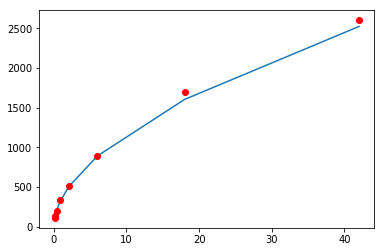

In [9]:
plt.show()

In [11]:
print "Chi Squared is " + str(chiSqr(x, y, dr))
print "R = " + str(np.exp(LineFitWt(x, y ,dr)[4])) + "t^" + str(np.exp(LineFitWt(x, y ,dr)[3]))

Chi Squared is 6.31352335079e-05
R = 341.344991102t^1.70752626253
